In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal


In [2]:
def gmm(X, K, max_iter=20, smoothing=10e-3):
    N, D = X.shape
    M = np.zeros((K, D))
    R = np.zeros((N, K))
    C = np.zeros((K, D, D))
    pi = np.ones(K) / K # uniform

    # initialize M to random, initialize C to spherical with variance 1
    for k in range(K):
        M[k] = X[np.random.choice(N)]
        C[k] = np.eye(D)

    costs = np.zeros(max_iter)
    weighted_pdfs = np.zeros((N, K)) # we'll use these to store the PDF value of sample n and Gaussian k
    for i in range(max_iter):
        # step 1: determine assignments / resposibilities
        for k in range(K):
            for n in range(N):
                weighted_pdfs[n,k] = pi[k]*multivariate_normal.pdf(X[n], M[k], C[k])

        for k in range(K):
            for n in range(N):
                R[n,k] = weighted_pdfs[n,k] / weighted_pdfs[n,:].sum()

        # a faster way to do step 1: "vectorization"
        # for k in xrange(K):
        #     weighted_pdfs[:,k] = pi[k]*multivariate_normal.pdf(X, M[k], C[k])
        # R = weighted_pdfs / weighted_pdfs.sum(axis=1, keepdims=True)

        # step 2: recalculate params
        for k in range(K):
            Nk = R[:,k].sum()
            pi[k] = Nk / N
            M[k] = R[:,k].dot(X) / Nk
            C[k] = np.sum(R[n,k]*np.outer(X[n] - M[k], X[n] - M[k]) for n in range(N)) / Nk + np.eye(D)*smoothing


        costs[i] = np.log(weighted_pdfs.sum(axis=1)).sum()
        if i > 0:
            if np.abs(costs[i] - costs[i-1]) < 0.1:
                break

    plt.plot(costs)
    plt.title("Costs")
    plt.show()

    random_colors = np.random.random((K, 3))
    colors = R.dot(random_colors)
    plt.scatter(X[:,0], X[:,1], c=colors)
    plt.show()

    print ("pi:", pi)
    print ("means:", M)
    print ("covariances:", C)
    return R

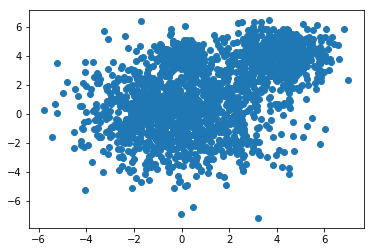

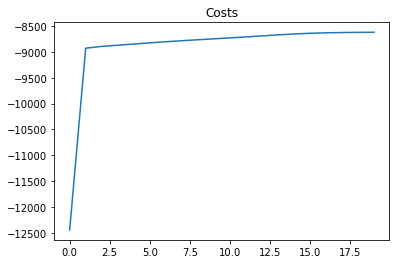

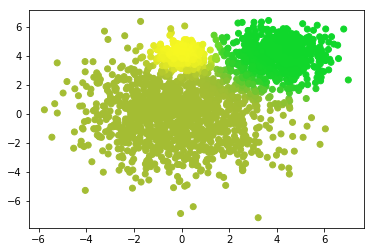

pi: [ 0.30354376  0.10603422  0.59042202]
means: [[ 3.99049956  3.93267234]
 [ 0.02770903  4.01690213]
 [-0.10563986 -0.01191169]]
covariances: [[[ 1.08466248  0.04719975]
  [ 0.04719975  1.00932275]]

 [[ 0.3196588  -0.01057806]
  [-0.01057806  0.2880439 ]]

 [[ 3.85349375 -0.11065408]
  [-0.11065408  3.8549798 ]]]


In [3]:
def main():
    # assume 3 means
    D = 2 # so we can visualize it more easily
    s = 4 # separation so we can control how far apart the means are
    mu1 = np.array([0, 0])
    mu2 = np.array([s, s])
    mu3 = np.array([0, s])

    N = 2000 # number of samples
    X = np.zeros((N, D))
    X[:1200, :] = np.random.randn(1200, D)*2 + mu1
    X[1200:1800, :] = np.random.randn(600, D) + mu2
    X[1800:, :] = np.random.randn(200, D)*0.5 + mu3

    # what does it look like without clustering?
    plt.scatter(X[:,0], X[:,1])
    plt.show()

    K = 3
    gmm(X, K)



if __name__ == '__main__':
    main()